In [1]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0    909      0 --:--:-- --:--:-- --:--:--   906
Updating fastai...
torchvision 0.2.2.post2 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [0]:
# Import libs
from fastai.vision import *

# Setup 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Creating your own dataset from Google Images

## Search images

Go to [Google Images](https://www.google.com/imghp?hl=EN), then search you are interested images. Scroll down and review these images, until you've seen all the images you want to download. All the images you scrolled past are now available to download.

## Download image URL dataset by Google Chrome

Now you can through some Javascript code in your Google Chrome which will save the URLs of all the images you want for you dataset.

Open Google Chrome's developer tool kit, and a small window the JavaScript `Conscole` tab will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [3]:
from google.colab import files
uploaded = files.upload()

Saving teddys_bear.csv to teddys_bear.csv
Saving grizzly_bear.csv to grizzly_bear.csv
Saving black_bear.csv to black_bear.csv


In [4]:
!ls -all

total 120
drwxr-xr-x 1 root root  4096 Mar  5 14:59 .
drwxr-xr-x 1 root root  4096 Mar  5 14:25 ..
-rw-r--r-- 1 root root 39494 Mar  5 14:59 black_bear.csv
drwxr-xr-x 1 root root  4096 Feb 26 17:33 .config
lrwxrwxrwx 1 root root    18 Mar  5 14:58 data -> /root/.fastai/data
-rw-r--r-- 1 root root 32511 Mar  5 14:59 grizzly_bear.csv
lrwxrwxrwx 1 root root    19 Mar  5 14:58 models -> /root/.torch/models
-rw-r--r-- 1 root root 29776 Mar  5 14:59 teddys_bear.csv


In [0]:
classes = ["black", "teddys", "grizzly"]
files = ["black_bear.csv", "teddys_bear.csv", "grizzly_bear.csv"]

In [12]:
path = Path('data/bears')

for i in range(len(classes)):
    dest = path/classes[i]
    dest.mkdir(parents=True, exist_ok=True)
    download_images(files[i], dest, max_pics=200)

Error https://images.all-free-download.com/images/graphicthumb/teddy_bear_toys_05_hd_pictures_166665.jpg HTTPSConnectionPool(host='images.all-free-download.com', port=443): Max retries exceeded with url: /images/graphicthumb/teddy_bear_toys_05_hd_pictures_166665.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f1bf7193c88>: Failed to establish a new connection: [Errno 111] Connection refused',))
Error http://images.harrods.com/product/harrods/my-harrods-teddy-bear_000000000003768635.jpg HTTPConnectionPool(host='images.harrods.com', port=80): Max retries exceeded with url: /product/harrods/my-harrods-teddy-bear_000000000003768635.jpg (Caused by ReadTimeoutError("HTTPConnectionPool(host='images.harrods.com', port=80): Read timed out. (read timeout=4)",))


Error https://media.npr.org/assets/img/2018/08/29/ap_18221700583150_wide-8485a73a449b2b371197afbde92558300f8cc90b-s800-c85.jpg HTTPSConnectionPool(host='media.npr.org', port=443): Read timed out. (read timeout=4)
Error https://www.washingtonpost.com/pbox.php?url=http://www.washingtonpost.com/news/animalia/wp-content/uploads/sites/56/2016/06/cub1.jpg&w=1484&op=resize&opt=1&filter=antialias&t=20170517 HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://thumbs-prod.si-cdn.com/yc9xNbi7YjNHdv46QVLgPDCAaF0=/fit-in/1072x0/https://public-media.si-cdn.com/filer/52/ce/52cee759-4c13-41a5-b465-9b07cd778340/neo-khutz2-8408.jpg HTTPSConnectionPool(host='thumbs-prod.si-cdn.com', port=443): Read timed out. (read timeout=4)
Error https://www.indianz.com/News/2017/06/30/yellowstonegrizzlycub.jpg ('Connection aborted.', OSError(0, 'Error'))
Error https://www.washingtonpost.com/resizer/3XR_4pCQML_c_PWsg5ByKcFsJow=/1484x0/arc-anglerfish-washpost-prod

In [7]:
path.ls()

[PosixPath('data/bears/teddys'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/black')]

In [13]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

black


cannot identify image file <_io.BufferedReader name='data/bears/black/00000053.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/bears/black/00000010.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/bears/black/00000105.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000033.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000072.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000099.jpg'>
teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000051.jpeg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000155.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000144.png'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000163.jpeg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000028.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000036.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000149.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000179.jpg'>
grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000187.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000050.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000194.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000066.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000110.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000179.jpg'>


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, 
                                  train=".", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), 
                                  size=224, 
                                  num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['black', 'grizzly', 'teddys']

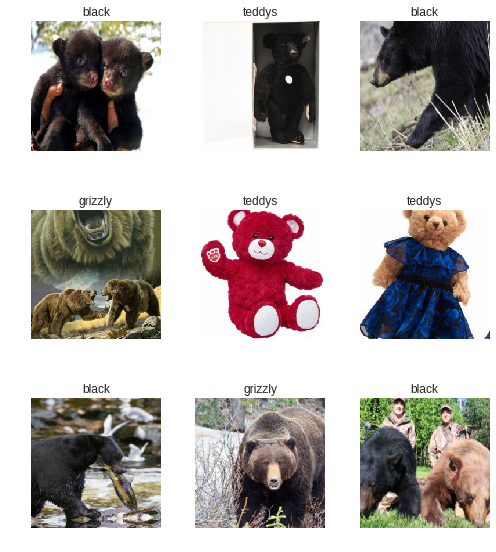

In [16]:
data.show_batch(rows=3, figsize=(7, 8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 452, 113)

# Train model

In [18]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 23404365.26it/s]


In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,0.861367,0.209879,0.053097,00:11
2,0.503588,0.166269,0.044248,00:10
3,0.356808,0.141492,0.044248,00:10
4,0.283231,0.135191,0.053097,00:10


In [0]:
learn.save("stage-1")

In [0]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


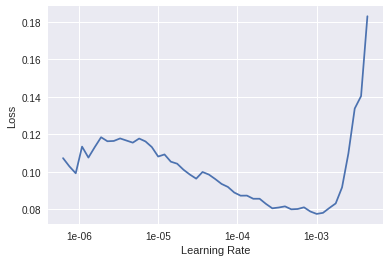

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(2, max_lr=slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
1,0.078289,0.188786,0.070796,00:10
2,0.076323,0.225892,0.061947,00:10


In [0]:
learn.save("stage-2")

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-03, 1e-04))

In [0]:
learn.save("stage-3")

## Interpretation

In [26]:
learn.load("stage-2")

Learner(data=ImageDataBunch;

Train: LabelList (452 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: data/bears;

Valid: LabelList (113 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,grizzly,black,black
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

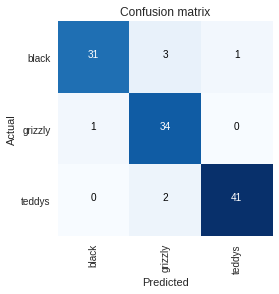

In [29]:
interp.plot_confusion_matrix()

In [28]:
interp.most_confused()

[('black', 'grizzly', 3),
 ('teddys', 'grizzly', 2),
 ('black', 'teddys', 1),
 ('grizzly', 'black', 1)]

## Clearning Up

Some of our top losses aren't due to bad performance by our model.

Using fast.ai widget ImageClaerner to remove photos that don't belong.

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

In [0]:
ImageClearner(ds, idxs, path, duplicates=True)

## Putting model in production

First, let's export the content of our Learner for production.

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

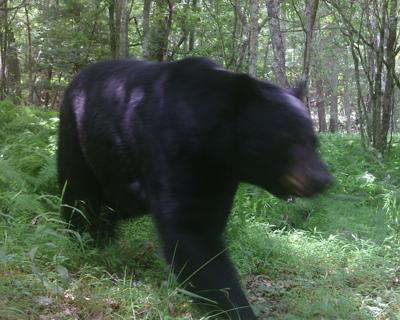

In [33]:
image = open_image(path/'black'/'00000187.jpg')
image

In [0]:
learn = load_learner(path)

In [37]:
pred, pred_idx, out = learn.predict(image)
print(pred, pred_idx, out)

black tensor(0) tensor([9.9997e-01, 2.4947e-05, 7.1660e-06])
